<a href="https://colab.research.google.com/github/purvabadhe/AI-in-Finance-/blob/main/Fin_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Data Collection and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


[*********************100%***********************]  1 of 1 completed


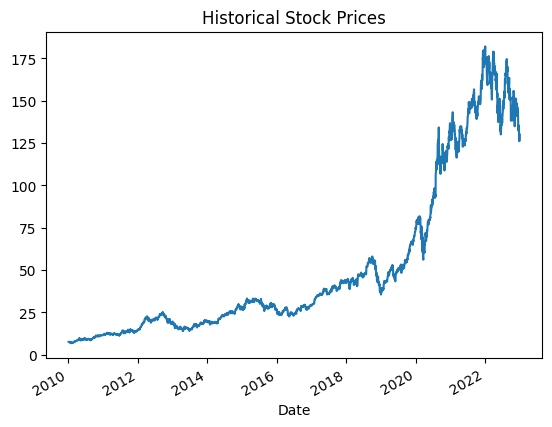

In [2]:
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
data['Close'].plot(title='Historical Stock Prices')
plt.show()


In [3]:
# Compute moving averages:

short_window = 40
long_window = 100

data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()


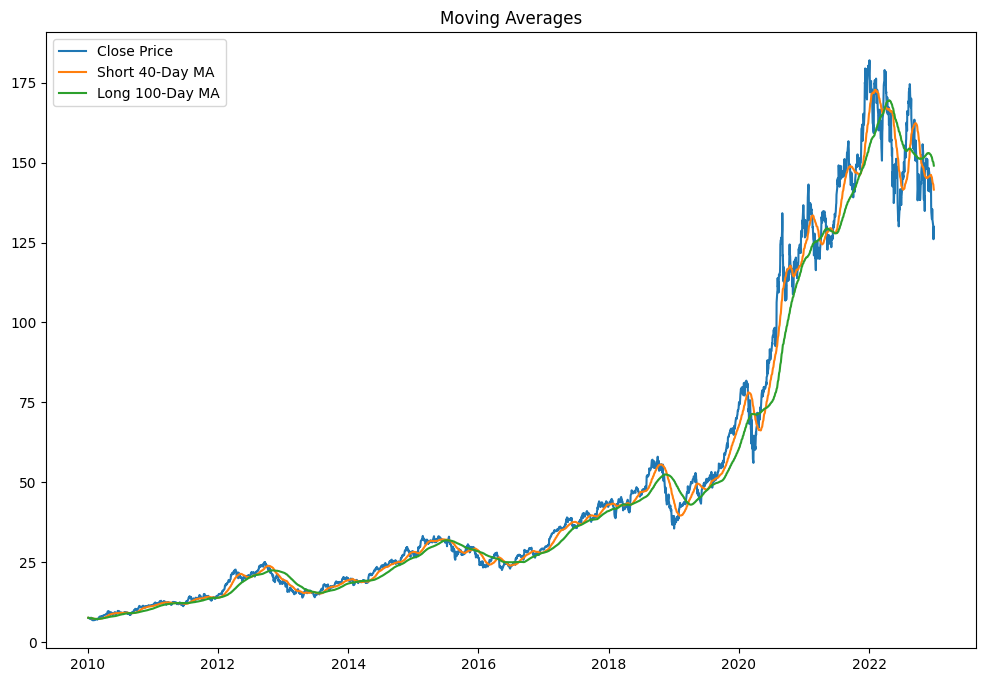

In [4]:

#Plot moving averages:

plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Short_MA'], label=f'Short {short_window}-Day MA')
plt.plot(data['Long_MA'], label=f'Long {long_window}-Day MA')
plt.title('Moving Averages')
plt.legend()
plt.show()


Step 2: Implementing the Moving Average Crossover Strategy

Create signals for buy and sell:

In [5]:
data['Signal'] = 0.0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
data['Position'] = data['Signal'].diff()
##

<ipython-input-5-e65a5ef9aa87>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1.0, 0.0)
<ipython-input-5-e65a5ef9aa87>:2: SettingWit

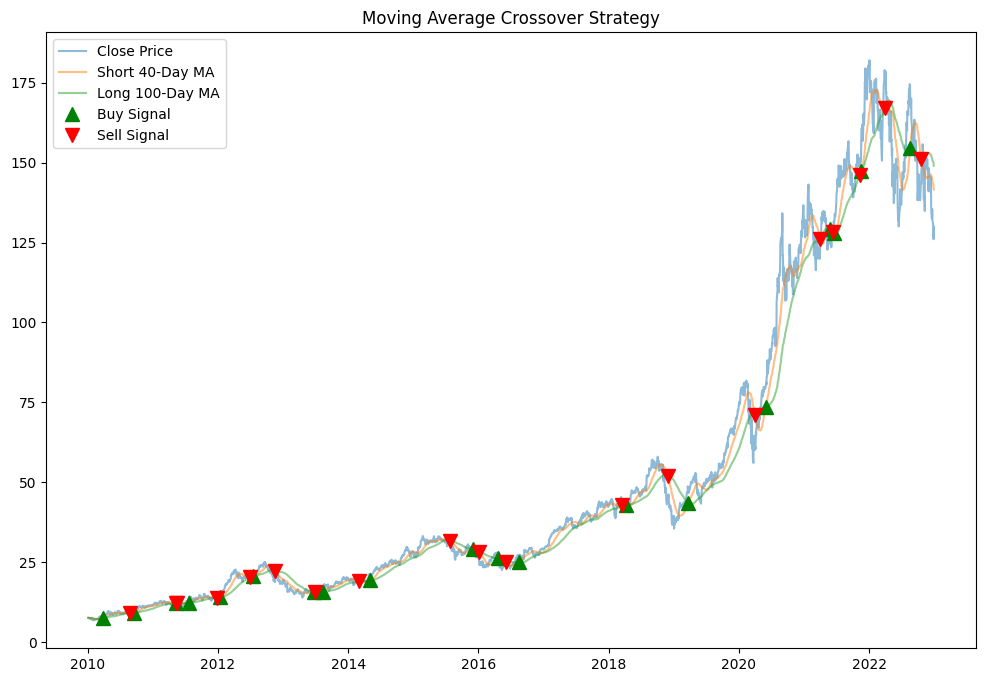

In [6]:
#Plot the signals on the stock price chart:

plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Short_MA'], label=f'Short {short_window}-Day MA', alpha=0.5)
plt.plot(data['Long_MA'], label=f'Long {long_window}-Day MA', alpha=0.5)

plt.plot(data[data['Position'] == 1].index,
         data['Short_MA'][data['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

plt.plot(data[data['Position'] == -1].index,
         data['Short_MA'][data['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()


#Step 3: Backtesting the Strategy

In [7]:
initial_capital = float(100000.0)
positions = pd.DataFrame(index=data.index).fillna(0.0)
positions[ticker] = data['Signal']
portfolio = positions.multiply(data['Close'], axis=0)
pos_diff = positions.diff()

portfolio['holdings'] = (positions.multiply(data['Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(data['Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()


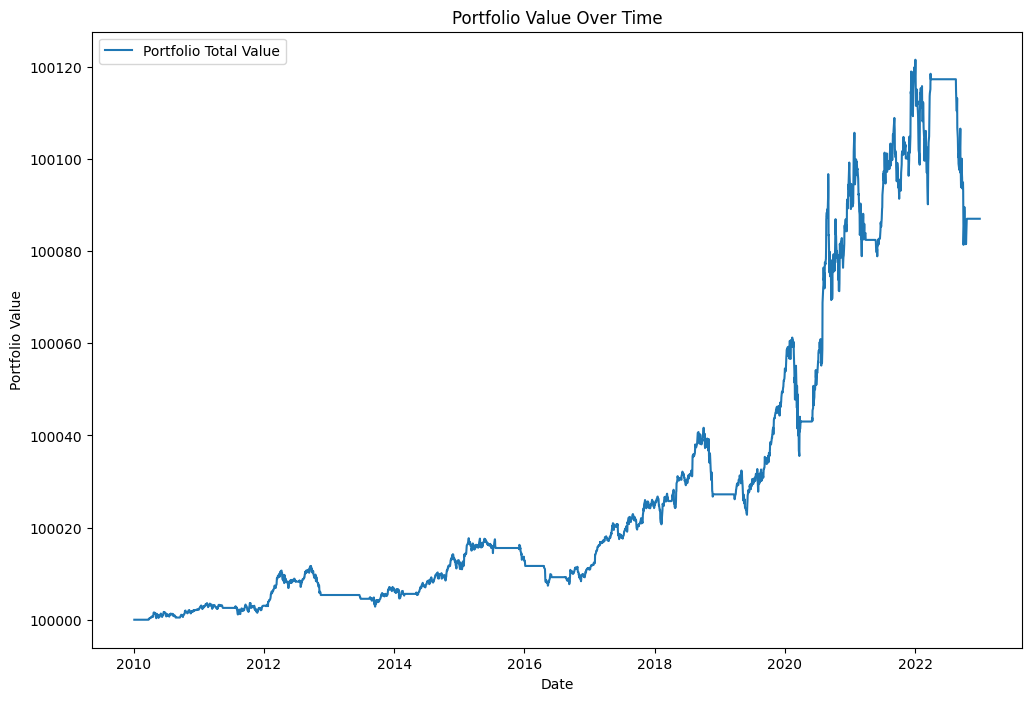

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(portfolio['total'], label='Portfolio Total Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


In [9]:
total_return = portfolio['total'][-1] - initial_capital
annual_return = portfolio['returns'].mean() * 252
annual_volatility = portfolio['returns'].std() * np.sqrt(252)
sharpe_ratio = annual_return / annual_volatility

print(f'Total Return: {total_return:.2f}')
print(f'Annual Return: {annual_return:.2%}')
print(f'Annual Volatility: {annual_volatility:.2%}')
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')


Total Return: 87.06
Annual Return: 0.01%
Annual Volatility: 0.02%
Sharpe Ratio: 0.37


<ipython-input-9-8e0b84e434f0>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = portfolio['total'][-1] - initial_capital
